In [1]:
using JSON
using CairoMakie

include("../Modules/TestingFunctions.jl")
using .TestingFunctions

In [2]:
function chart_tests(title, xlabel, ylabel, results)
    fig = Figure(size=(800, 600))
    ax = Axis(fig[1,1], 
        xlabel=xlabel, 
        ylabel=ylabel,
        title=title)

    for (i, (key, test)) in enumerate(pairs(results))
        dependent_var = test["errors"]
        independent_var = test[test["testing_parameter"]][1:length(dependent_var)]
        lines!(ax, independent_var, dependent_var, color=Cycled(i), label=key)
        scatter!(ax, independent_var, dependent_var, color=Cycled(i))
    end

    axislegend(position=(:right, :bottom))

    fig
end

chart_tests (generic function with 1 method)

In [3]:
ON_layered_test_search = Dict(
    "prediction_type" => "multi_step",
    "testing_params" => Dict(
        "mask_states_b4_readout" => false,
        "stochastic" => true,
        "stochastic_rescale_V_rec" => true
    ),
    "data" => "Lorenz 0_01",
    "error_func" => "RMSE",
    "testing_parameter" => "n_steps",
    "k" => 50,
    "ignore_first" => 100,
    "m" => 3,
    "trials" => 30
)
ON_layered_test = find_test(ON_layered_test_search)[1];

In [4]:
vanilla_test_search = copy(ON_layered_test_search)
vanilla_test_search["m"] = 1
vanilla_test_search["k"] = 300
vanilla_test = find_test(vanilla_test_search)[1];

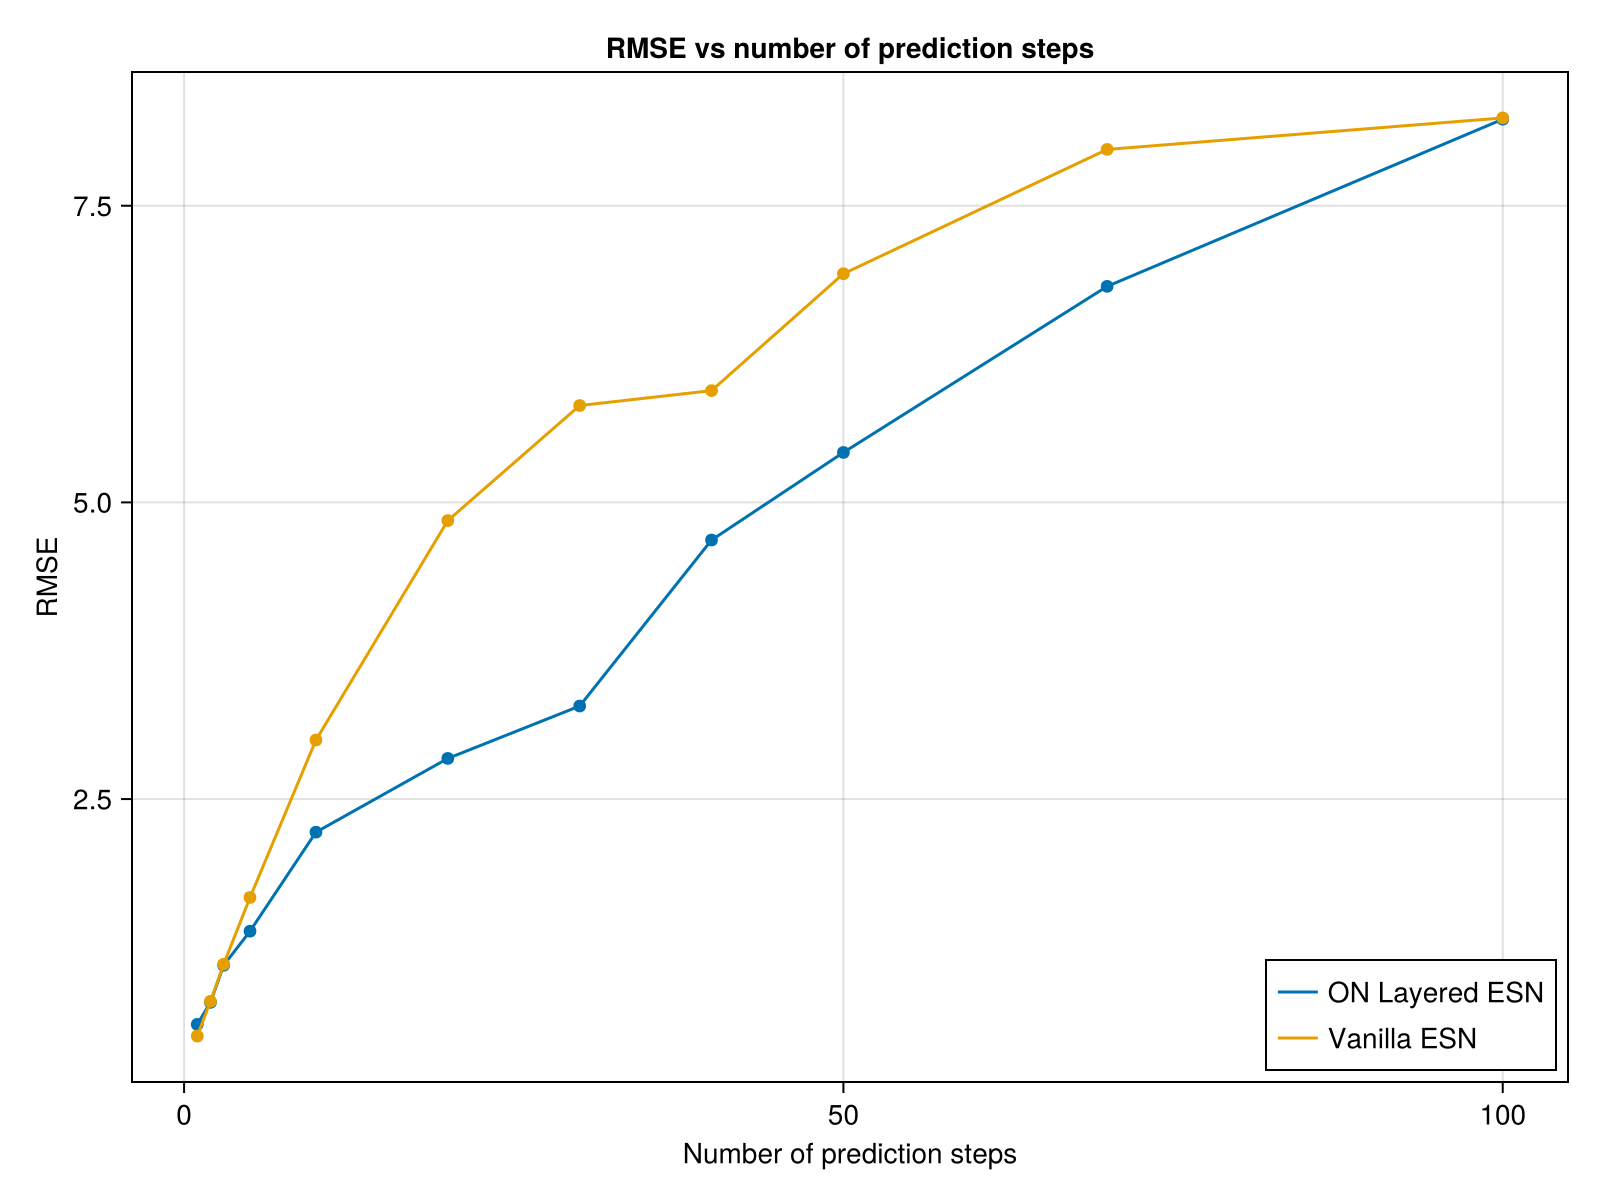

In [5]:
chart_tests(
    "RMSE vs number of prediction steps",
    "Number of prediction steps",
    "RMSE",
    Dict(
        "Vanilla ESN" => vanilla_test,
        "ON Layered ESN" => ON_layered_test
    )
)

In [9]:
ON_layered_turning_test_search = copy(ON_layered_test_search)
ON_layered_turning_test_search["error_func"] = "turning_partition_RMSE"
ON_layered_turning_test = find_test(ON_layered_turning_test_search)[1];

vanilla_turning_test_search = copy(ON_layered_turning_test_search)
vanilla_turning_test_search["m"] = 1
vanilla_turning_test_search["k"] = 300
vanilla_turning_test = find_test(vanilla_turning_test_search)[1];

ErrorException: No matching test found

In [7]:
chart_tests(
    "Turning RMSE vs number of prediction steps",
    "Number of prediction steps",
    "Turning RMSE",
    Dict(
        "Vanilla ESN" => vanilla_turning_test,
        "ON Layered ESN" => ON_layered_turning_test
    )
)

UndefVarError: UndefVarError: `vanilla_turning_test` not defined

In [8]:
chart_tests(
    "Turning RMSE vs number of prediction steps",
    "Number of prediction steps",
    "Turning RMSE",
    Dict(
        "Vanilla ESN" => vanilla_test,
        "ON Layered ESN" => ON_layered_test,
        "Vanilla ESN (turning)" => vanilla_turning_test,
        "ON Layered ESN (turning)" => ON_layered_turning_test
    )
)

UndefVarError: UndefVarError: `vanilla_turning_test` not defined